## 03. Regularização

In [ ]:
"""
Importação das bibliotecas utilizadas na questão:
1. Numpy = Fornece um grande conjunto de funções e operações de biblioteca 
que auxiliam na realização de cálculos numéricos e manipulação de matrizes.

2. Matplotlib = Trata-se de uma biblioteca que é utilizada para plotar gráficos
"""
import numpy as np 
import matplotlib.pyplot as plt

* Carregue os dados contidos no arquivo ex1data3.txt. 

In [ ]:
"""
Função responsável por fazer a leitura dos datasets.
Parâmetros da função: file_name = nome do arquivo, 
delimeter_ = trata-se do que tá separando cada valor do dataset e o 
encoding_ = Trata-se do código em que o dataset foi codificado 
"""
def load_dataset(file_name, delimiter_, encoding_):
    return np.genfromtxt(file_name, delimiter = delimiter_, encoding=encoding_)

data = load_dataset('./datasets/ex1data3.txt', ' ','UTF-8')
data # Exibe os valores do dataset

- O arquivo contem 47 linhas e 6 colunas de dados. Cada coluna se refere a uma variável. Neste problema, deve-se desenvolver um modelo onde a variável da coluna 6 será estimada a partir das demais variáveis. Os dados apresentados referem-se a um problema de estimação do preço de casas. As variáveis 1, 2, 3, 4 e 5 são características dos imóveis e serão utilizadas como entrada do problema de regressão. A variável 6 é o preço do imóvel.


In [ ]:
# Pega todos os valores do dataset, exceto os valores da última coluna e cria uma nova coluna com valores 1
def get_x(data):
    x = data[:, :-1]
    m = x.shape[0]
    ones = np.ones((m, 1))
    return np.concatenate((ones, x), axis = 1)

# Pega os últimos valores da coluna do dataset e faz a transposta
def get_y(data):
    y = data[:, -1]
    y = np.array([y])
    return y.T

# Função responsável por calcular os mínimos quadrados regulares
def min_squares_regularized(data, reg_coef):
    X = get_x(data)
    y = get_y(data)
    gram = X.T.dot(X)
    identity = np.identity(len(gram))
    identity[0,0] = 0
    temp = gram + identity*reg_coef
    return np.linalg.inv(temp).dot(X.T.dot(y)) 

# Função responsável por cálcular o error quadrado médio
def mqe(data, w):
    X = get_x(data)
    y = get_y(data)
    m = X.shape[0]
    return (1.0/(2.0*m))*np.sum((X.dot(w) - y)**2)

- Divida o conjunto de dados entre treino e teste. Para este problema, os primeiros 30 dados serão utilizados para treino e o restante será usado para teste.


In [ ]:
# No treino pegamos os 30 primeiros valores do dataset e no teste do 31 até o fim
treino = data[:30, :]
teste = data[30:, :]

- Encontre os coeficientes da regressão utilizando o método dos mínimos quadrados regularizado para os seguintes valores de λ = [0 1 2 3 4 5]. Utilize o conjunto de treinamento.
  - **Apresentar**: Valores finais dos coeficientes

In [ ]:
# Criamos um array que ficou com os valores dos coeficientes de regressão
coeficientes_de_regressao = [0, 1, 2, 3, 4, 5]

# O laço de repetição ele percorre todo o array criado anteriormente e aplica na função do mínimos quadrados
for coef in coeficientes_de_regressao:
    print("Valores do coeficiente {}:".format(coef))
    print(min_squares_regularized(treino, coef))

### Quais variáveis parecem ser menos relevantes para a regressão?

Ao realizar a análise dos pesos finais da regressão com o coeficiente de regularização 5, percebe-se que as variáveis menos relevantes são as de número 4 e 5. Porque os valores de ambas variáveis ficaram uma casa decimal abaixo dos valores das demais variáveis. 

- Encontrar o valor do EQM para os dados de treinamento e de teste para cada um dos valores de λ.

In [ ]:
# Criação de dois arrays para armazenar os erros quadráticos médio
mqe_treino = []
mqe_teste = []

"""
Nesse laço de repetição, criamos a váriavel coef e iremos percorrer todo o array do coeficiente de regressão.
Dentro do laço chamos duas funções que criamos anteriormente, a primeira é a dos minimos quadráticos, onde passamos os 30 primeiros elementos do dataset e 
o seu coefiente. 
Com base nas duas variáveis criadas anteriormente, adicionamos ao array os valores do erro quadrático médio
"""
for coef in coeficientes_de_regressao:
    w = min_squares_regularized(treino, coef)
    mqe_treino.append(mqe(treino, w))
    mqe_teste.append(mqe(teste, w))

- Apresentar: Dois gráficos. EQM x λ no conjunto de treinamento e EQM x λ no conjunto de teste

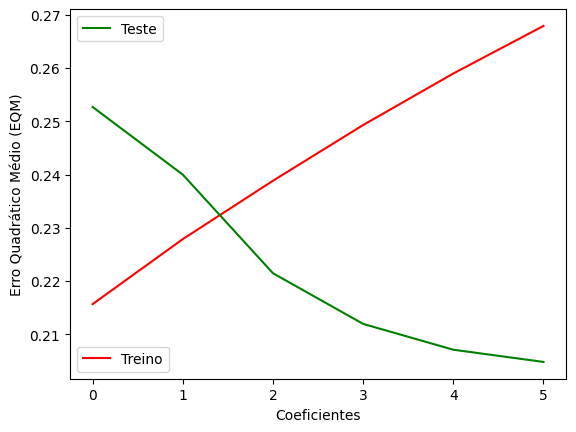

In [16]:
# Plotagem do gráfico, utilizamos o matplotlib para nos auxiliar na plotagem do gráfico.
treino_plt, = plt.plot(coeficientes_de_regressao, mqe_treino, color = 'r', label="Treino")
teste_plt, = plt.plot(coeficientes_de_regressao, mqe_teste, color = 'g', label="Teste")
primeira_legenda = plt.legend(handles=[treino_plt], loc=3)
ax = plt.gca().add_artist(primeira_legenda)
plt.legend(handles=[teste_plt], loc=2)
plt.xlabel('Coeficientes')
plt.ylabel('Erro Quadrático Médio (EQM)')
plt.show()

### Como os valores dos coeficientes variam com λ ? Explique o motivo.

Ficou percepitível que os pesos diminuiam conforme o valor do coeficiente de regularização aumentava. Isso acorre pois o coeficiente de regularização funciona como uma espécie de penalização para cada um dos pesos. Sendo assim, os pesos que contribuiem para a diminuição do erro serão os menos penalizados e os pesos que menos contribuiem serão os mais penalizados.

### Comente o crescimento/decrescimento dos erros presente nas figuras EQM x λ

No gráfico plotado anteriormente, vemos que o erro no conjunto de teste diminuiu e por sua vez o erro no conjunto de treinamento aumentou seguindo o aumento do coeficiente de regularização. Isso ocorre devido ao modelo inicial com λ=0 ter sofrido um overfitting em relação ao processo de treinamento dos dados. Entretanto, conforme o aumento do λ, esse overfitting acaba diminuindo e o modelo passa a ter uma capacidade de generalização melhor, fazendo com que esse erro no conjunto de testes diminua enquanto o erro no conjunto de treinamento aumenta.